This notebook looks at the abundance of "butyrate producers" in the donor samples and if that correlates with FMT outcome.

I'll mostly be following similar analyses as what I did in the Kump 2018 data.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [29]:
fotu = '../../data/qiime-proc/jacob2017/exported_data/jacob2017.feature-table.txt'
fmeta = '../../data/clean/jacob2017.metadata.txt'
ftidy = '../../data/clean/jacob2017.tidy_otu_w_taxonomy.txt'

In [30]:
tidydf = pd.read_csv(ftidy, sep='\t')
# Add relative abundance column
tidydf['rel_abun'] = tidydf['reads'] / tidydf['total_reads']
tidydf.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,Confidence_silva,otu_id_silva,rel_abun
0,SRR5629110,37776.0,355281665bb16bf1045de9cf09b44711,13149.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.92043,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.348078
1,SRR5629162,16359.0,355281665bb16bf1045de9cf09b44711,0.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.92043,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.000000
2,SRR5629141,18039.0,355281665bb16bf1045de9cf09b44711,0.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.92043,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.000000
3,SRR5629092,32542.0,355281665bb16bf1045de9cf09b44711,0.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.92043,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.000000
4,SRR5629118,13522.0,355281665bb16bf1045de9cf09b44711,0.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.92043,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.000000


# Find butyrate producers

As before, we'll use the list from the mSystems paper (see the Kump 2018 notebook for more info).


In [31]:
genera = ['Odoribacter', 
          'Clostridium_XIVa',
          'Coprococcus',
          'Butyricicoccus',
          'Pseudoflavonifractor',
          'Flavonifractor',
          'Anaerostipes',
          'Roseburia',
          'Oscillibacter',
          'Faecalibacterium',
          'Subdoligranulum'
         ]

## Compare SILVA vs GG

How many of the GreenGenes taxonomic identifiers have one of these?

In [32]:
alltaxa_gg = tidydf['otu_id_gg'].unique().tolist()

for g in genera:
    print(g)
    tmp = [i for i in alltaxa_gg if 'g__' + g in i]
    tmp = set([i.rsplit(';', 1)[0] for i in tmp])
    print('\n'.join(tmp) + '\n')

Odoribacter
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Odoribacter;s__

Clostridium_XIVa


Coprococcus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__catus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__eutactus

Butyricicoccus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__pullicaecorum

Pseudoflavonifractor


Flavonifractor


Anaerostipes
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__

Roseburia
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__faecis
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__

Oscillibacter


Faecalibacterium
k__Bacteria;p__Firmicutes;c__Clostridia;o_

And SILVA?

In [33]:
alltaxa_silva = tidydf['otu_id_silva'].unique().tolist()

for g in genera:
    print(g)
    tmp = [i for i in alltaxa_silva if g in i]
    tmp = set([i.rsplit(';', 1)[0] for i in tmp])
    print('\n'.join(tmp) + '\n') 

Odoribacter
D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia;D_3__Bacteroidales;D_4__Marinifilaceae;D_5__Odoribacter;D_6__gutmetagenome
D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia;D_3__Bacteroidales;D_4__Marinifilaceae;D_5__Odoribacter;D_6__unculturedorganism
D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia;D_3__Bacteroidales;D_4__Marinifilaceae;D_5__Odoribacter;D_6__

Clostridium_XIVa


Coprococcus
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus2;D_6__
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus3;D_6__
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus2;D_6__unculturedCoprococcussp.
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus3;D_6__unculturedbacterium
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus1;D_

Compare number and abundances of GG vs SILVA butyrate producers.

In [34]:
# Make a list of the OTUs that are butyrate producing genera
but_silva = []
for g in genera:
    but_silva += [i for i in alltaxa_silva if g in i]
but_silva = list(set(but_silva))

but_gg = []
for g in genera:
    but_gg += [i for i in alltaxa_gg if g in i]
but_gg = list(set(but_gg))

print(len(but_gg), len(but_silva))

(83, 80)


In [35]:
but_abun_gg = tidydf.query('otu_id_gg == @but_gg').groupby('sample_id').sum()['rel_abun']
but_abun_silva = tidydf.query('otu_id_silva == @but_silva').groupby('sample_id').sum()['rel_abun']

(0, 0.7)

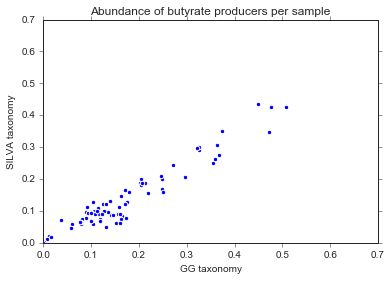

In [36]:
data = pd.merge(
    but_abun_gg.reset_index(name='gg_abun'), 
    but_abun_silva.reset_index(name='silva_abun'))

plt.scatter(data['gg_abun'], data['silva_abun'])
plt.xlabel('GG taxonomy')
plt.ylabel('SILVA taxonomy')
plt.title('Abundance of butyrate producers per sample')
plt.ylim([0, 0.7])
plt.xlim([0, 0.7])

Oh, this is much better than Kump. Let's go with the GG taxonomy (since it tends to represent more of the samples)

# Butyrate producers in donors

Next, let's look at the abundance of these bugs in the donors, stratified by whether their patient was a responder or non-responder.

In [37]:
meta = pd.read_csv(fmeta, sep='\t', index_col=0)
meta.head()

,patient_id,sample_type,donor_patient,remission_w4,response_w4,sample_title,study_accession,secondary_study_accession,sample_accession,secondary_sample_accession,...,sra_aspera,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient
run_accession,,,,,,,,,,,,,,,,,,,,,
SRR5629088,1,donor,donor,No,No,Longman.FMT.001.Donor.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173004,SRS2240022,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/008/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/008/SRR5629088,NaN,NaN,NaN,Longman.FMT.001.Donor.Pool253.Integrated,NaN,NaN,2017-11-09,1
SRR5629096,1,W2,patient,No,No,Longman.FMT.001.W2.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07172996,SRS2240014,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/006/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/006/SRR5629096,NaN,NaN,NaN,Longman.FMT.001.W2.Pool253.Integrated,NaN,NaN,2017-11-09,1
SRR5629135,1,W4,patient,No,No,Longman.FMT.001.W4.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173013,SRS2239975,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/005/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/005/SRR5629135,NaN,NaN,NaN,Longman.FMT.001.W4.Pool253.Integrated,NaN,NaN,2017-11-09,1
SRR5629089,7,W2,patient,No,No,Longman.FMT.007.W2.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173005,SRS2240021,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/009/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/009/SRR5629089,NaN,NaN,NaN,Longman.FMT.007.W2.Pool253.Integrated,NaN,NaN,2017-11-09,7
SRR5629094,7,W4,patient,No,No,Longman.FMT.007.W4.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173016,SRS2240016,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/004/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/004/SRR5629094,NaN,NaN,NaN,Longman.FMT.007.W4.Pool253.Integrated,NaN,NaN,2017-11-09,7


In [38]:
# Combine tidy OTU table with metadata
tidydf = pd.merge(tidydf, meta, left_on='sample_id', right_index=True)

In [ ]:
tidy

In [43]:
# Total abundance of butyrate producers per donor stool
# (The groupby is to keep track of other metadata of interest)
donor_but = (tidydf
    .query('otu_id_gg == @but_gg')
    .query('donor_patient == "donor"')
    .groupby(['sample_id', 'sample_type', 'donor_patient', 'remission_w4', 'response_w4', 'patient_id'])
    .sum()
    ['rel_abun']
).reset_index()
donor_but.head()

,sample_id,sample_type,donor_patient,remission_w4,response_w4,patient_id,rel_abun
0,SRR5629088,donor,donor,No,No,1,0.168825
1,SRR5629090,donor,donor,No,No,2,0.142246
2,SRR5629098,donor,donor,No,No,3,0.164350
3,SRR5629104,donor,donor,No,Yes,24,0.135703
4,SRR5629107,donor,donor,No,Yes,4,0.130846


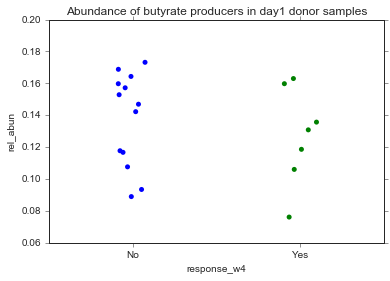

In [45]:
sns.stripplot(data=donor_but, x='response_w4', y='rel_abun')
plt.title('Abundance of butyrate producers in donor samples')

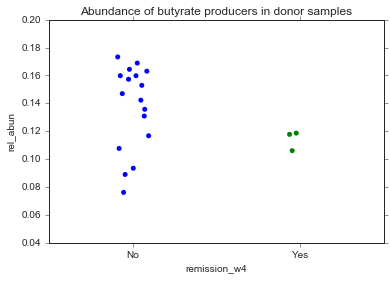

In [46]:
sns.stripplot(data=donor_but, x='remission_w4', y='rel_abun')
plt.title('Abundance of butyrate producers in donor samples')